In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from davenet import Neuron, Layer, Sigmoid
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 1]

In [4]:
l0 = Layer(5, Sigmoid(), 2)
print(l0)
l1 = Layer(2, Sigmoid())(l0)
print(l1)
l2 = Layer(50, Sigmoid())(l1)
print(l2)
output = Layer(1, Sigmoid())(l2)
print(output)

Layer(num_neurons=5, activation=Sigmoid(name='sigmoid'), input_shape=2, neurons=[Neuron(input_shape=2, activation_function=Sigmoid(name='sigmoid'), weights=array([ 0.27133316, -0.049507  ]), bias=array([0.01915566]), error=0, delta=array([], dtype=float64), delta_weights=array([], dtype=float64), z=None, a=None), Neuron(input_shape=2, activation_function=Sigmoid(name='sigmoid'), weights=array([-0.3970541, -0.9724122]), bias=array([0.01915566]), error=0, delta=array([], dtype=float64), delta_weights=array([], dtype=float64), z=None, a=None), Neuron(input_shape=2, activation_function=Sigmoid(name='sigmoid'), weights=array([ 0.53003907, -0.78654243]), bias=array([0.01915566]), error=0, delta=array([], dtype=float64), delta_weights=array([], dtype=float64), z=None, a=None), Neuron(input_shape=2, activation_function=Sigmoid(name='sigmoid'), weights=array([ 0.9601816 , -0.65701407]), bias=array([0.01915566]), error=0, delta=array([], dtype=float64), delta_weights=array([], dtype=float64), z=

In [5]:
all_E = []

for i in range(10000):
    epoch_E = []
    for x, y in zip(X, Y):
        x = np.array(x)
        y = np.array(y)
        a0 = l0.forward(x)
        a1 = l1.forward(a0)
        a2 = l2.forward(a1)
        o = output.forward(a2)

        E = 0.5*(y - o)**2
        epoch_E += [E]
        E_prime = (o - y)

        output.backward(E_prime)
        l2.backward(np.dot(output.weights.T, output.error))
        l1.backward(np.dot(l2.weights.T, l2.error))
        l0.backward(np.dot(l1.weights.T, l1.error))
    all_E += [np.mean(epoch_E)]
    print(all_E[-1])
    
    output.update_weights(lr=0.05)
    l2.update_weights(lr = 0.05)
    l1.update_weights(lr = 0.05)
    l0.update_weights(lr = 0.05)

0.32526712873141017
0.18078832797775007
0.09863675155685347
0.09410564984544954
0.09380149296596094
0.0937611861694733
0.09374511030987333
0.09373156338138451
0.09371829858808253
0.09370506771364616
0.09369184149483384
0.09367861581616999
0.0936653894742035
0.09365216152462426
0.09363893099247414
0.09362569686700896
0.0936124581186703
0.09359921370954201
0.09358596259819729
0.09357270374168335
0.09355943609624649
0.09354615861754217
0.09353287026064121
0.0935195699799597
0.09350625672915983
0.09349292946104065
0.09347958712742399
0.09346622867904035
0.09345285306541337
0.09343945923474449
0.09342604613379754
0.09341261270778314
0.09339915790024328
0.09338568065293526
0.09337217990571665
0.09335865459642882
0.09334510366078128
0.09333152603223567
0.09331792064188917
0.09330428641835857
0.09329062228766319
0.09327692717310826
0.0932631999951682
0.09324943967136891
0.09323564511617034
0.09322181524084901
0.09320794895337947
0.09319404515831642
0.09318010275667565
0.09316612064581507
0.093

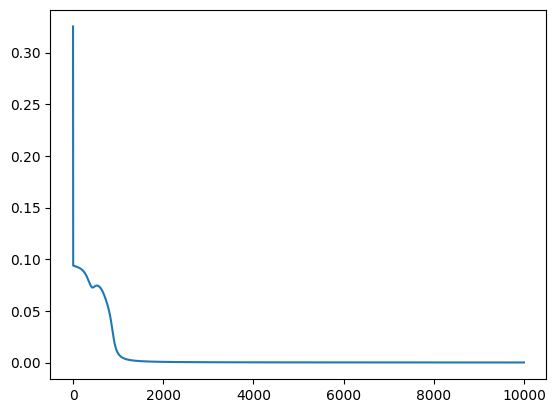

In [6]:
plt.figure()
plt.plot(all_E)
plt.show()